In [1]:
# DIRECTORY SET
import os
import sys
import traceback
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

# Enable autoreload
%load_ext autoreload
%autoreload 2

# Import custom modules
from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils
from destinyapp.customlibrary import controller

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [ ]:
services.stream_plot.controller.run()

In [2]:
# Input parameter
video_id="OqVH_MTBQ6k"

# load data from testing_visualization_annotation_results.json


# plot_segments_old, category_locations_old, color_dict_old = await services.RV.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics, stream_recap_data.transcript)

non categorized 0.34372781065088764
minor topics 0.14355029585798815
Biden's Decision Not to Seek Re-election 0.04964497041420119
Kamala Harris as Potential Democratic Nominee 0.11159763313609468
Trump's Actions and Republican Party 0.1415976331360947
Immigration and Asylum Policy 0.10757396449704143
Analysis of Federalist Paper No. 78 0.14426035502958579


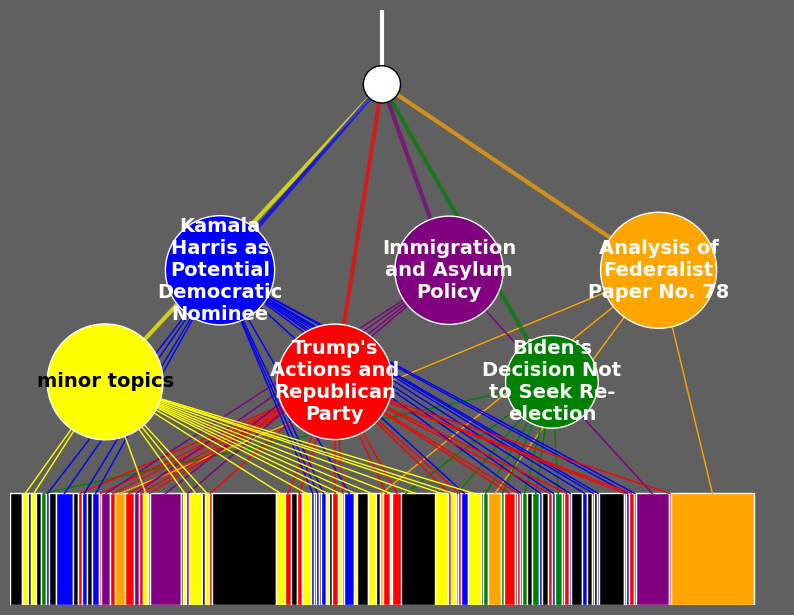

In [6]:
stream_recap_data=await utils.get_recap_data(video_id)
testing_bool=True
if not testing_bool:
    annotated_results, major_topics, minor_topics = await services.StreamPlotController.generate_data(stream_recap_data)
else:
    import json
    with open(f"testing_visualization_data_gen.json", "r") as f:
        data_gen=json.load(f)

    annotated_results=data_gen["annotated_results"]
    major_topics=data_gen["major_topics"]
    minor_topics=data_gen["minor_topics"]
    stream_recap_data=await utils.get_recap_data(video_id)


plot_object, annotated_results, plot_segments, category_locations = await services.StreamPlotController.process_data(stream_recap_data,  annotated_results, major_topics, minor_topics, video_id)

await services.StreamPlotController.generate_plot(plot_object)

# Prod Testing

In [11]:
class StreamPlotController:
    async def generate_data(stream_recap_data: StreamRecapData):
        text_chunks_no_overlap = await services.stream_plot.data_gen.create_text_chunks(stream_recap_data.transcript, 0)

        text_chunk_batches = await services.stream_plot.data_gen.generate_text_chunk_batches(text_chunks_no_overlap)

        topic_annotations_str = await services.stream_plot.data_gen.annotate_major_minor_topics(stream_recap_data.recap)
        major_topics, minor_topics = services.stream_plot.data_gen.process_topic_annotations_str(topic_annotations_str)

        responses, annotated_results = await services.stream_plot.data_gen.annotate_all_batches(text_chunk_batches, topic_annotations_str)

        return annotated_results, major_topics, minor_topics
    
    async def process_data(stream_recap_data: StreamRecapData, annotated_results, major_topics, minor_topics, video_id):
        annotated_segments, category_locations = await services.stream_plot.data_processing.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics, stream_recap_data.transcript)

        plot_segments=await  services.stream_plot.data_processing.annotated_to_plot_segments(annotated_segments)

        plot_object=await  services.stream_plot.data_processing.create_plot_object(plot_segments, category_locations, video_id)

        return plot_object, annotated_segments, plot_segments, category_locations
    
    async def generate_plot(plot_object):
        return await services.stream_plot.data_plotting.generate_plot(plot_object)
    
    @classmethod
    async def run(self, video_id):
        stream_recap_data=await utils.get_recap_data(video_id)

        annotated_results, major_topics, minor_topics = await self.generate_data(stream_recap_data)

        plot_object, annotated_results, plot_segments, category_locations = await self.process_data(stream_recap_data,  annotated_results, major_topics, minor_topics, video_id)

        await self.generate_plot(plot_object)

Cost:  0.007353
Cost:  0.00139975
Cost:  0.002322
Cost:  0.00227225
Cost:  0.00236175
Cost:  0.00248225
Cost:  0.0024720000000000002
Cost:  0.002572
Cost:  0.0029372499999999998
Cost:  0.003057
Cost:  0.00305025
Cost:  0.0032025
Cost:  0.00166125
Cost:  0.0022725
Cost:  0.0025397500000000003
Results:  20
Results:  20
Results:  20
Results:  0 Text Chunks:  20  Returning blank equal to text chunks length
Results:  20
Results:  20
Results:  13 Text Chunks:  20  Returning blank equal to text chunks length
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  12
non categorized 0.34372781065088764
minor topics 0.14355029585798815
Biden's Decision Not to Seek Re-election 0.04964497041420119
Kamala Harris as Potential Democratic Nominee 0.11159763313609468
Trump's Actions and Republican Party 0.1415976331360947
Immigration and Asylum Policy 0.10757396449704143
Analysis of Federalist Paper No. 78 0.14426035502958579


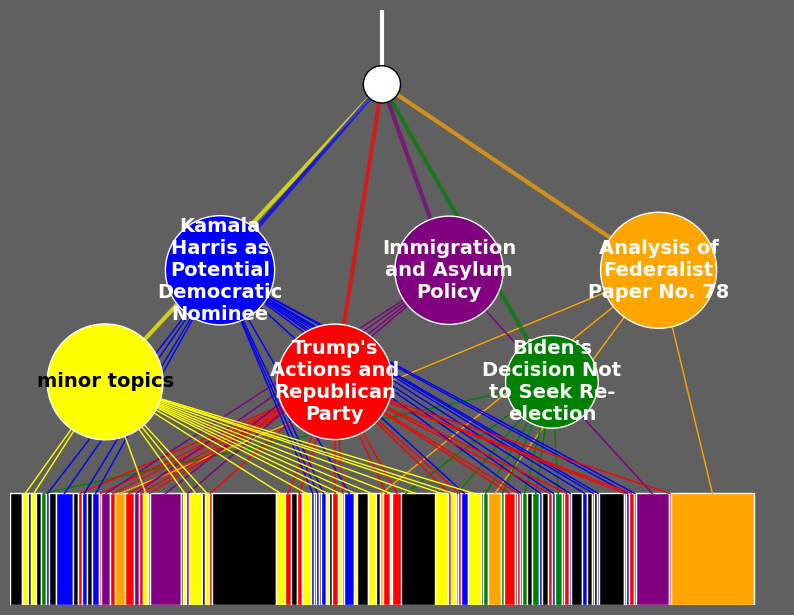

In [12]:
await StreamPlotController.run(video_id=video_id)